In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fuzzywuzzy as fuzz
from fuzzywuzzy import process

# Load the data CSVs

In [262]:
# Load full_output.csv
df = pd.read_csv('full_output.csv')
df.columns = df.columns.str.strip()

# Drop Event and TEA column
df = df.drop(columns=['Event', 'TEA'])
print(len(df))

# Load pml_output.csv
pml_df = pd.read_csv('pml_output.csv')
pml_df.columns = pml_df.columns.str.strip()

60669


# Remove disqualified and null rows

In [263]:
# Remove DNA, DQ
judging_columns = ['Stage Judge 1', 'Stage Judge 2', 'Stage Judge 3', 'Stage Final', 'SR Judge 1', 'SR Judge 2', 'SR Judge 3', 'SR Final']

for i in judging_columns:
    df = df[df[i] != 'DNA']
    df = df[df[i] != 'DQ']

# Convert blanks to nans
for i in judging_columns:
    df[i] = df[i].replace(['', ' '], np.nan)

print(len(df))

60141


In [264]:
# Trim whitespace, double spaces, commas, and periods from selections
selection_columns = ['Selection 1', 'Selection 2', 'Selection 3']

for i in selection_columns:
    df[i] = df[i].str.strip()
    df[i] = df[i].str.replace('  ', ' ', regex=False)
    df[i] = df[i].str.replace(',', '', regex=False)
    df[i] = df[i].str.replace('.', '', regex=False)

# Trim whitespace from classification column
df['Classification'] = df['Classification'].str.strip()



## Get the average judge rating

In [265]:
# Average together Stage Judge 1, 2, and 3 into a new column
for i in judging_columns:
    df[i] = df[i].astype(float)

df['Stage Average'] = (df['Stage Judge 1'] + df['Stage Judge 2'] + df['Stage Judge 3']) / 3

In [266]:
def top_n_grabber(n, df):
    # Select all 'Selection 1' rows as a list
    selection_1_list = df['Selection 1'].tolist()
    # Select all 'Selection 2' rows
    selection_2_list = df['Selection 2'].tolist()
    # Select all 'Selection 3' rows
    selection_3_list = df['Selection 3'].tolist()
    # combine selection 1, 2, and 3 into one list
    full_selection_list = pd.DataFrame(selection_1_list + selection_2_list + selection_3_list)

    top_20_df = pd.DataFrame(full_selection_list.value_counts()[:n])
    top_20_df.columns = ['Count']
    top_20_df.reset_index(drop=False, inplace=True)
    top_20_df.columns = ['Selection', 'Count']
    top_20_df

    # make selection column into a list
    selection_list = top_20_df['Selection'].tolist()
    value_list = top_20_df['Count'].tolist()
    return selection_list, value_list

In [267]:
for column in selection_columns:
    # remove all inside parenthesis
    df[column] = df[column].str.replace('\(.*\)', '', regex=True)
    # trim whitespace
    df[column] = df[column].str.strip()


In [268]:
# get different datasets
df_6a = df[df['Conference'] == 'AAAAAA']
df_6a_varsity = df[(df['Classification'] == 'Varsity') & (df['Conference'] == 'AAAAAA')]
df_6a_nonvarsity = df[(df['Classification'] == 'Non-Varsity') & (df['Conference'] == 'AAAAAA')]
df_6a_subnonvarsity = df[(df['Classification'].str.contains('Sub Non')) & (df['Conference'] == 'AAAAAA')]
df_5a = df[df['Conference'] == 'AAAAA']
df_5a_varsity = df[(df['Classification'] == 'Varsity') & (df['Conference'] == 'AAAAA')]
df_5a_nonvarsity = df[(df['Classification'] == 'Non-Varsity') & (df['Conference'] == 'AAAAA')]
df_5a_subnonvarsity = df[(df['Classification'].str.contains('Sub Non')) & (df['Conference'] == 'AAAAA')]
df_4a = df[df['Conference'] == 'AAAA']
df_4a_varsity = df[(df['Classification'] == 'Varsity') & (df['Conference'] == 'AAAA')]
df_4a_nonvarsity = df[(df['Classification'] == 'Non-Varsity') & (df['Conference'] == 'AAAA')]
df_4a_subnonvarsity = df[(df['Classification'].str.contains('Sub Non')) & (df['Conference'] == 'AAAA')]
df_3a = df[df['Conference'] == 'AAA']
df_3a_varsity = df[(df['Classification'] == 'Varsity') & (df['Conference'] == 'AAA')]
df_3a_nonvarsity = df[(df['Classification'] == 'Non-Varsity') & (df['Conference'] == 'AAA')]
df_3a_subnonvarsity = df[(df['Classification'].str.contains('Sub Non')) & (df['Conference'] == 'AAA')]
df_2a = df[df['Conference'] == 'AA']
df_2a_varsity = df[(df['Classification'] == 'Varsity') & (df['Conference'] == 'AA')]
df_2a_nonvarsity = df[(df['Classification'] == 'Non-Varsity') & (df['Conference'] == 'AA')]
df_2a_subnonvarsity = df[(df['Classification'].str.contains('Sub Non')) & (df['Conference'] == 'AA')]
df_1a = df[df['Conference'] == 'A']
df_1a_varsity = df[(df['Classification'] == 'Varsity') & (df['Conference'] == 'A')]
df_1a_nonvarsity = df[(df['Classification'] == 'Non-Varsity') & (df['Conference'] == 'A')]
df_1a_subnonvarsity = df[(df['Classification'].str.contains('Sub Non')) & (df['Conference'] == 'A')]
df_5a_6a_varsity = df[(df['Classification'] == 'Varsity') & ((df['Conference'] == 'AAAAAA') | (df['Conference'] == 'AAAAA'))]
df_2005 = df[df['Year'] == 2005]
df_2006 = df[df['Year'] == 2006]
df_2007 = df[df['Year'] == 2007]
df_2008 = df[df['Year'] == 2008]
df_2009 = df[df['Year'] == 2009]
df_2010 = df[df['Year'] == 2010]
df_2011 = df[df['Year'] == 2011]
df_2012 = df[df['Year'] == 2012]
df_2013 = df[df['Year'] == 2013]
df_2014 = df[df['Year'] == 2014]
df_2015 = df[df['Year'] == 2015]
df_2016 = df[df['Year'] == 2016]
df_2017 = df[df['Year'] == 2017]
df_2018 = df[df['Year'] == 2018]
df_2019 = df[df['Year'] == 2019]
df_2020 = df[df['Year'] == 2020]
df_2021 = df[df['Year'] == 2021]
df_2022 = df[df['Year'] == 2022]

df_year_list = [df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]
year_list = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]



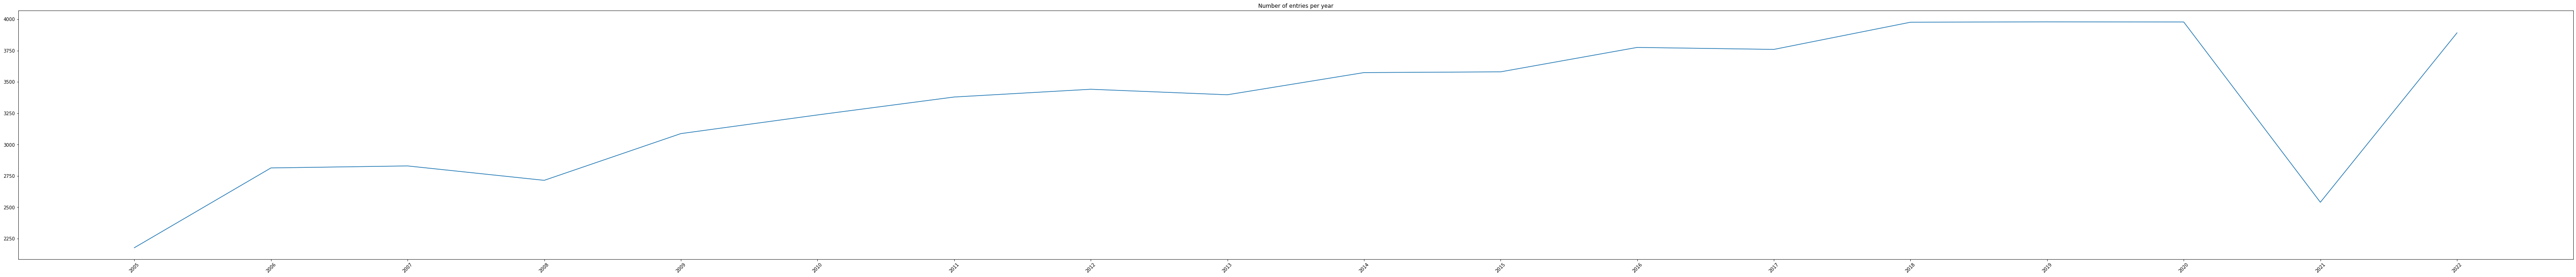

In [269]:
# Plot a line graph of the number of rows in each year
plt.xticks(year_list)
plt.xticks(rotation=45)
plt.title('Number of entries per year')
plt.plot(year_list, [len(df_2005), len(df_2006), len(df_2007), len(df_2008), len(df_2009), len(df_2010), len(df_2011), len(df_2012), len(df_2013), len(df_2014), len(df_2015), len(df_2016), len(df_2017), len(df_2018), len(df_2019), len(df_2020), len(df_2021), len(df_2022)])
plt.show()


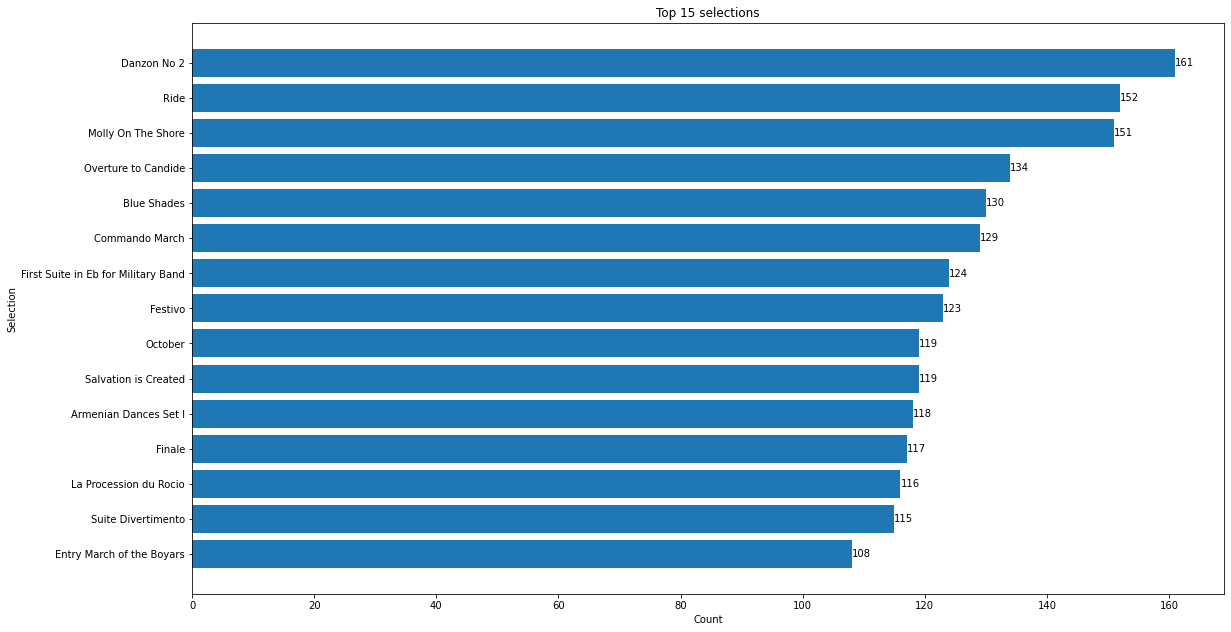

In [273]:
#plot top n selections
def plotter(n=20, df=df):
    fig, ax = plt.subplots()
    bars = ax.barh(top_n_grabber(n, df)[0], top_n_grabber(n, df)[1])
    ax.set_title(f'Top {n} selections')
    ax.set_xlabel('Count')
    ax.set_ylabel('Selection')
    for bars in ax.containers:
        ax.bar_label(bars)
    # invert the y-axis
    ax.invert_yaxis()
   # reset size of the plot
    fig.set_size_inches(18.5, 10.5)

    plt.show()

plotter(15, df_5a_6a_varsity)

# Find Rows by Selection Title

In [226]:
# Combine all rows where any selection contains the search term
def selection_finder(selection, df):
    finder_df = df[(df['Selection 1'].str.contains(selection)) | (df['Selection 2'].str.contains(selection)) | (df['Selection 3'].str.contains(selection))]
    return finder_df

selection = 'Melody Shop'
df_for_search = df_5a_6a_varsity

selection_finder_df = selection_finder(selection, df_for_search)
selection_finder_df

,Unnamed: 0,School,City,Directors,Conference,Classification,Year,ID,Stage Judge 1,Stage Judge 2,...,Stage Final,SR Judge 1,SR Judge 2,SR Judge 3,SR Final,Award,Selection 1,Selection 2,Selection 3,Stage Average
101,29550,Victoria Memorial High School,Victoria,Phillip J. Mikula,AAAAA,Varsity,2005,17593,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,RMA,The Melody Shop March,A Hymn for The Lost And The Living,Niagara Falls,1.000000
2828,31793,Lake Highlands High School,Dallas,Joshua Blankenship,AAAAA,Varsity,2006,21634,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,,Symphonic Metamorphosis,When Jesus Wept,The Melody Shop,1.666667
3063,32328,The Woodlands HS,The Woodlands,Brett Johnson,AAAAA,Varsity,2006,26359,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,RMA,Excerpts from Manzoni Requiem,J�ai ete au bal,The Melody Shop March,1.000000
7912,34045,Westfield H.S.,Houston,Jodie Rhodes,AAAAA,Varsity,2007,33262,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,RMA,Melody Shop,Symphonic Metamorphosis,Baron Cimetiere's Mambo,1.000000
11879,35917,Churchill HS,San Antonio,Albert Lo,AAAAA,Varsity,2009,45603,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,A,Aegean Festival Overture,Awayday,The Melody Shop,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58800,54094,Centennial High School,FRISCO,Andy Rein,AAAAA,Varsity,2022,175405,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,A,The Melody Shop,Kingfishers Catchfire,Four Scottish Dances,1.000000
58827,54106,Prosper High School,Prosper,"Brandon Holt / Aaron Renzenbrink, Aaron Dugge...",AAAAAA,Varsity,2022,175896,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,A,The Melody Shop,March To The Scaffold,La Fiesta Mexicana,1.000000
59212,54520,Legacy High School,Mansfield,"Andrew Nance / Christopher Monasmith, Chris V...",AAAAA,Varsity,2022,176326,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,A,The Melody Shop,Elsas Procession to the Cathedral,The Speed of Heat,1.000000
59324,54368,Lake Travis High School,Austin,"Richard Hicks / Taylor Trevino, Lance Brightw...",AAAAAA,Varsity,2022,176168,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,A,The Melody Shop,Frozen Cathedral,Symphonie Fantastique - Dream of a Witches Sab...,1.000000


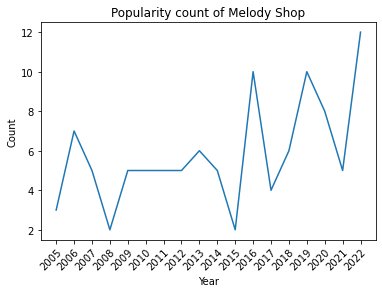

In [227]:
selection = 'Melody Shop'
yearly_count_values = []

for year in df_year_list:
    selection_finder_df = selection_finder(selection, year)
    yearly_count_values.append(len(selection_finder_df))

# make a line graph of the yearly count of selections
def yearly_count_plotter(yearly_count_values):
    fig, ax = plt.subplots()
    ax.plot(yearly_count_values)
    ax.set_title(f'Popularity count of {selection}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    # set number of ticks on x-axis to match len(year_list)
    ax.set_xticks(range(len(year_list)))
    # set x labels to year_list
    ax.set_xticklabels(year_list)
    # rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.show()

yearly_count_plotter(yearly_count_values)

# Find Rows by Directors

In [129]:
def director_finder(director, df):
    finder_df = df[df['Directors'].str.contains(director)]
    return finder_df

director = 'Kevin MacDonald'
df_for_search = df

director_finder_df = director_finder(director, df_for_search)
director_finder_df.sort_values(by='Stage Average', ascending=False)

,Unnamed: 0,School,City,Directors,Conference,Classification,Year,ID,Stage Judge 1,Stage Judge 2,...,Stage Final,SR Judge 1,SR Judge 2,SR Judge 3,SR Final,Award,Selection 1,Selection 2,Selection 3,Stage Average
48568,27144,Sachse High School,Sachse,"John Robinson / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity B,2019,150128,2.0,2.0,...,2.0,2.0,1.0,2.0,2.0,,Miss Liberty,Knights of Dunvegan,La Madre de los Gatos,2.333333
47958,25830,Sachse High School,Sachse,"John Robinson / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity A,2019,150131,2.0,2.0,...,2.0,1.0,1.0,2.0,1.0,2,Rough Riders,Gigue Francaise,Chanteys,2.333333
47551,51083,Sachse HS Band,Sachse,"Holly Taylor / Kevin MacDonald, John Robinson",AAAAAA,Varsity,2019,148887,2.0,1.0,...,2.0,1.0,1.0,1.0,1.0,1,Rolling Thunder March,Divertimento for Winds and Percussion,Danzon No. 2,1.666667
59895,27283,Sachse High School,Garland,"Garrett Tucker / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity B,2022,177206,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,,Valley Forge March,Japanese Pictures,Flight of Eagles,1.666667
49425,12803,Sachse High School,Garland,Kevin MacDonald / Holly Taylor/John Robinson,AAAAAA,Non-Varsity,2019,150018,2.0,1.0,...,2.0,1.0,2.0,1.0,1.0,2,Sol Y Sombra,The Fire of Eternal Glory,Light Cavalry,1.666667
41759,25619,Sachse High School,Sachse,"John Robinson / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity A,2017,127766,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,,Big Four March,The Lowlands of Scotland,La Bonne Aventure,1.666667
45849,27078,Sachse HS Band,Sachse,Holly Taylor / Kevin MacDonald and John Robinson,AAAAAA,Sub Non-Varsity B,2018,138766,1.0,1.0,...,1.0,3.0,2.0,3.0,3.0,2,Omaha Beach Concert March,Legend of Knife River,Sketches of Canada,1.333333
34815,25507,Sachse High School,Sachse,"John Robinson / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity A,2016,116448,1.0,2.0,...,1.0,2.0,1.0,1.0,1.0,C,The Big Cage,Blue Ridge Saga,La Madre de los Gatos,1.333333
39974,10741,Sachse HS Band,Sachse,Kevin MacDonald / Holly Taylor/John Robinson,AAAAAA,Non-Varsity,2017,127750,1.0,1.0,...,1.0,1.0,1.0,2.0,1.0,C,American Folk Rhapsody No. 2,Redemption,Americans We,1.333333
37940,9821,Sachse HS Band,Sachse,Kevin MacDonald / Holly Taylor/John Robinson,AAAAAA,Non-Varsity,2016,116449,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,C,Men of Ohio,Fantasy on a Theme by Samual Barber,Choreography,1.333333


In [35]:
director_score = director_finder_df['Stage Average'].mean()
director_score


1.3174603174603174

# Get the UIL ID for each selection

In [37]:
# combine the pml_df columns title and composer into a single column
pml_df['Full Selection'] = pml_df['Title'] + ' - ' + pml_df['Composer']

# Saved cells for reference

## Cleaning the selections

In [ ]:
# Make a single list containing all unique selections

# Select all 'Selection 1' rows as a list
selection_1_list = df['Selection 1'].tolist()
# Select all 'Selection 2' rows
selection_2_list = df['Selection 2'].tolist()
# Select all 'Selection 3' rows
selection_3_list = df['Selection 3'].tolist()
# combine selection 1, 2, and 3 into one list
full_selection_df = pd.DataFrame(selection_1_list + selection_2_list + selection_3_list)

# Drop duplicates and export as list
full_selection_df = full_selection_df.drop_duplicates()
full_selection_list = full_selection_df[0].tolist()
len(full_selection_list)

In [ ]:
# Move text within parentheses to a new column
full_selection_list['Selection Name'] = full_selection_list['Full Selection'].str.extract(r'(.*?)\(.*?\)')
# Take full selection and move text within parentheses to a new column
full_selection_list['Composer Name'] = full_selection_list['Full Selection'].str.extract(r'\((.*)\)')
full_selection_list


In [ ]:
# Create a new column to fuzzy match df['Selection 1'] to pml_df['Full Selection']
#df['Selection 1 Match'] = df['Selection 1'].apply(lambda x: process.extractOne(x, pml_df['Full Selection'])[0])
#df['Selection 2 Match'] = df['Selection 2'].apply(lambda x: process.extractOne(x, pml_df['Full Selection'])[0]) 
#df['Selection 3 Match'] = df['Selection 3'].apply(lambda x: process.extractOne(x, pml_df['Full Selection'])[0])